<a href="https://colab.research.google.com/github/velezcanizares/Chi-cuadrado/blob/main/ChiCuadrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test Chi Cuadrado
#### Introducción
El Test de Chi cuadrado nos permite un criterio sólido para encontrar relaciones entre variables cualitativas, utilizando las tablas de contingencia. El fundamento de este test es comparar las sumas de diferencias al cuadrado entre lo que estamos observando, es decir nuestros datos reales, y aquello que cabría esperar en una situación en donde no existe ninguna relación entre variables. Esto permite cuantificar la magnitud de todas estas distancias, compararlas con una distribución (Chi cuadrado) y decidir si podemos afirmar si estas variables, estan relacionadas significativamente. Una de las debilidades de este test, es que no permite cuantificar cada una de las relaciones entre categorias, pero permite afirmaciones globales como por ejemplo "Fumar esta relacionado significativamente con el cáncer de pulmón". Por otra parte, una exploración visual de las tablas, nos indica en que dirección esta dada esta relación. Los datos a analizar son de unas aerolineas estadounidenses.

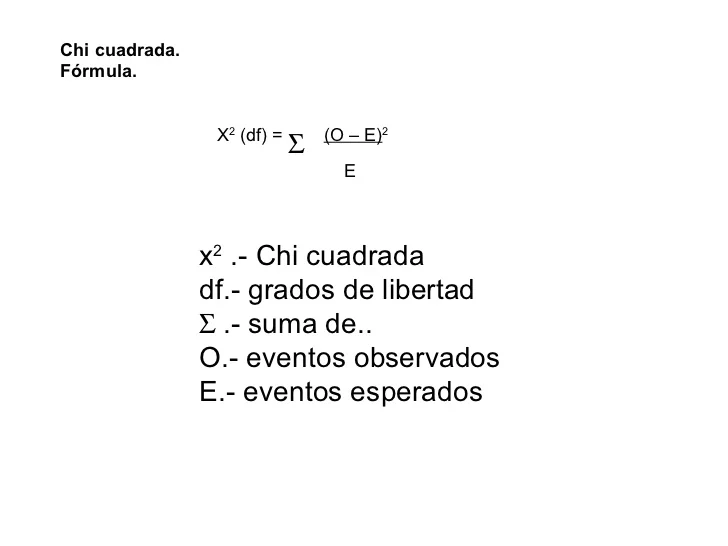

#### Paso 1
Primero debemos impotar las librerias y cargar datos

In [2]:
import pandas as pd
import numpy as np

In [11]:
#Cargamos la data
df = pd.read_csv("/content/base_datos_2008.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,335.0,...,4.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2008,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,3231.0,...,5.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2008,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,448.0,...,3.0,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2008,1.0,3.0,4.0,926.0,930.0,1054.0,1100.0,WN,1746.0,...,3.0,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2008,1.0,3.0,4.0,1829.0,1755.0,1959.0,1925.0,WN,3920.0,...,3.0,10.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,32.0


In [12]:
np.random.seed(0) #Fijamos semilla para cuando queramos replicar el código se obtendrá el mismo resultado cuando se aplique funciones aleatorias
# Para simplificar la interpretación de resultado creamos un subset de nuestros datos
df = df[df["Origin"].isin(["HOU","ATL","IND"])]
df = df.sample(frac=1) #reordenamos datos
df = df[0:10000] #Seleccionamos las 10.000 primeras filas, para que se ejecute todo más rápido

#### Paso 2
Vamos a generar una nueva variable (BigDelay), que distinga entre dos casos:
* Cuando el ArrDelay sea mayor a 30, entonces es un gran retraso. (Valor True)
* Cuando sea menor, solo es un retraso. (Valor False)

Por otra parte, se crea ua tabla de contingencia y se guarda en "observados". Seleccionando dos columnas para estudiar BigDelay y Origin

In [13]:
df["BigDelay"] = df["ArrDelay"] > 30
observados = pd.crosstab(index=df["BigDelay"],columns=df["Origin"], margins=True) #Con margins true le decimos que guarde los margenes de la tabla

In [14]:
observados

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,6849,961,682,8492
True,1193,181,134,1508
All,8042,1142,816,10000


#### Paso 3 Impotamos el paquete que realizará el test

In [16]:
from scipy.stats import chi2_contingency

#### Paso 4 crear objeto
A partir de la tabla de observados que hemos generado, le pedimos que cree un objeto

In [17]:
test = chi2_contingency(observados)

In [18]:
test

Chi2ContingencyResult(statistic=2.0528626403213672, pvalue=0.9147731515151348, dof=6, expected_freq=array([[ 6829.2664,   969.7864,   692.9472,  8492.    ],
       [ 1212.7336,   172.2136,   123.0528,  1508.    ],
       [ 8042.    ,  1142.    ,   816.    , 10000.    ]]))

El test contiene el valor estadistico (suma de diferencias al cuadrado) y el pvalor, es una medida que permite tomar decisiones basados en algún criterio. Por último tenemos la tabla de valores esperados, que vamos a comparar con los valores observados.

In [20]:
#guardamos los valores esperados en un data frame
esperados = pd.DataFrame(test[3])

In [21]:
esperados

,0,1,2,3
0,6829.2664,969.7864,692.9472,8492.0
1,1212.7336,172.2136,123.0528,1508.0
2,8042.0000,1142.0000,816.0000,10000.0


La tabla esperados contiene los valores teóricos esperados si no hubiese ningun tipo de relación. Estos valores no son posibles, ya que son decimales, solo es una aproximación teórica.

#### Paso 5 crear tablas de valores esperados y observados.
Creamos tabla de valores esperados relativos y observados relativos, para que sea más facil de comparar. Esto lo conseguimos con funciones round sobre cada una de las tablas.

In [22]:
esperados_rel = round(esperados.apply(lambda r : r/len(df)*100 , axis=1),2)

In [23]:
observados_rel = round(observados.apply(lambda r : r/len(df)*100 , axis=1),2)

In [24]:
esperados_rel

,0,1,2,3
0,68.29,9.70,6.93,84.92
1,12.13,1.72,1.23,15.08
2,80.42,11.42,8.16,100.00


In [25]:
observados_rel

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,68.49,9.61,6.82,84.92
True,11.93,1.81,1.34,15.08
All,80.42,11.42,8.16,100.00


Como se puede observar los margenes (Columna "All") se han mantenido (pero en otra escala). Esto tiene que ser así, si no significa que algo está mal, ya que lo que queriamos era modificar la cantidad de True´s y False´s.

#### Paso 6 Realizar test
Una cosa a tener en cuenta es el pvalor, este indicador es un concepto complejo, pero para explicarlo de manera muy resumida se puede decir que es la probabilidad de que las relaciones sean mucho más extremas de la que hemos visto en nuestros datos, si comparamos con la situación en la que no hay ninguna relación.

##### Resumen test de hipotesis
* Si el p-valor < 0.05, hay diferencias significativas. Hay relación entre variables
* Si el p-valor > 0.05, no hay diferencias significativas. No hay relación entre variables

In [26]:
test[1]

0.9147731515151348

Hemos obtenido un 0.914 aprox(>0.05). por lo cual, no podmeos afirmar que haya relación entre variables.